Equipo 14 | Integrantes:

*   Bruno Ivan Salgado Molina
*   José David Martínez Cantera
*   María del Pilar Piñones Contreras

In [ ]:
#Predicción de Diabetes: Prever si un paciente tiene diabetes o no utilizando un conjunto de datos de diabetes y modelos de clasificación,
#como regresión logística.
#Recursos: [Conjunto de datos de diabetes]
#(https://www.kaggle.com/uciml/pima-indians-diabetes-database)

# **PARTE 1**
Pandas y Análisis Exploratorio de Datos (EDA)
Objetivos:

*   Crear Series y DataFrames y aprovecharlas a la perfección
*   Usar conceptos estadísticos para realizar un análisis exploratorio datasets para entender sus datos antes de realizar cualquier manipulación

# Información del Dataset
**Población:** Los datos incluyen información de mujeres Pima, mayores de 21 años.

El Dataset se conforma de las siguientes **variables de diagnóstico:**

* Pregnancies: Número de embarazos
* Glucose: Glucosa en sangre
* BloodPressure: Presión arterial
* SkinThickness: Grosor de la piel
* Insulin: Insulina
* BMI: Índice de Masa Corporal
* DiabetesPedigreeFunction: Función que establece un valor de riesgo de diabetes por historia clínica familiar.
* Age: Edad

**La variable target es Outcome** con el valor 1 para positivo a Diabetes y 0 para negativo.



In [2]:
#Importar paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

#Obtener de informacion del CSV
df_base = pd.read_csv("/content/diabetes.csv")
df_base.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [ ]:
# Analisis Exploratorio para hallar nulos
contador = 0
for columna in df_base.columns:
  prueba = df_base[df_base[columna].isna()]
  if len(prueba) != 0:
    print("La columna: '"+columna +"' SI tiene valores nulos")
    print(prueba.head(5))
  else:
    print("La columna: '"+columna +"' no tiene valores nulos")
    contador +=1

if contador == len(df_base.columns):
  print("--------------------------------------------")
  print("El conjunto de datos no tiene valores nulos.")
  print("--------------------------------------------")

La columna: 'Pregnancies' no tiene valores nulos
La columna: 'Glucose' no tiene valores nulos
La columna: 'BloodPressure' no tiene valores nulos
La columna: 'SkinThickness' no tiene valores nulos
La columna: 'Insulin' no tiene valores nulos
La columna: 'BMI' no tiene valores nulos
La columna: 'DiabetesPedigreeFunction' no tiene valores nulos
La columna: 'Age' no tiene valores nulos
La columna: 'Outcome' no tiene valores nulos
--------------------------------------------
El conjunto de datos no tiene valores nulos.
--------------------------------------------


In [ ]:
contador = 0
columnas_flotantes = ['BMI', 'DiabetesPedigreeFunction']
for columna in df_base.columns:
  if columna in columnas_flotantes:
    prueba = df_base[df_base[columna].apply(lambda x: isinstance(x, float)==False)]
  else:
    prueba = df_base[df_base[columna].apply(lambda x: isinstance(x, int)==False)]
  if len(prueba) != 0:
    print("La columna: '"+columna +"' NO tiene formato homogéneo")
    print(prueba.head(5))
  else:
    print("La columna: '"+columna +"' tiene formato homogéneo")
    contador += 1

if contador == len(df_base.columns):
  print("--------------------------------------------")
  print("El conjunto de datos tiene formato homogéneo.")
  print("--------------------------------------------")

La columna: 'Pregnancies' tiene formato homogéneo
La columna: 'Glucose' tiene formato homogéneo
La columna: 'BloodPressure' tiene formato homogéneo
La columna: 'SkinThickness' tiene formato homogéneo
La columna: 'Insulin' tiene formato homogéneo
La columna: 'BMI' tiene formato homogéneo
La columna: 'DiabetesPedigreeFunction' tiene formato homogéneo
La columna: 'Age' tiene formato homogéneo
La columna: 'Outcome' tiene formato homogéneo
--------------------------------------------
El conjunto de datos tiene formato homogéneo.
--------------------------------------------


Si observamos el conjunto de datos, no tendría sentido hallar valores con ceros en las columnas de Glucosa, Presión Sanguínea, Grosor de piel, Insulina o BMI, de modo que revisamos cuanto porcentaje de ceros existen para cada una.

In [4]:
# Lista de columnas donde los ceros no son válidos
columnas_con_ceros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Calcula el porcentaje de ceros para cada columna
for columna in columnas_con_ceros_invalidos:
  porcentaje_ceros = (df_base[columna] == 0).mean()*100
  print(f"La columna {columna} tiene {porcentaje_ceros:0.2f} % de ceros.")

La columna Glucose tiene 0.65 % de ceros.
La columna BloodPressure tiene 4.56 % de ceros.
La columna SkinThickness tiene 29.56 % de ceros.
La columna Insulin tiene 48.70 % de ceros.
La columna BMI tiene 1.43 % de ceros.


De aquí podemos concluir que es necesario realizar dos cosas:

1.   Hay que eliminar las filas que tengan ceros en las columnas de Glucosa, Presión sanguínea y BMI, ya que estos representan un porcentaje pequeño de todo el conjunto de datos.
2.   Sustituir los valores de cero de las columnas de Grosor de Piel e Insulina, ya que representan un conjunto demasiado grande como para descartarse. En este caso se va a colocar el promedio de los datos que corresponden a diagnósticos positivos/negativos según corresponda para cada fila con ceros.



In [5]:
for columna in  ['SkinThickness', 'Insulin']:
  media_negativos = df_base[(df_base['Outcome'] == 0) & (df_base[columna] != 0)][columna].mean()
  media_positivos = df_base[(df_base['Outcome'] == 1) & (df_base[columna] != 0)][columna].mean()
  print(f"Para diagnosticos negativos, el promedio de {columna} es : {media_negativos}")
  print(f"Para diagnosticos positivos, el promedio de {columna} es : {media_positivos}")

Para diagnosticos negativos, el promedio de SkinThickness es : 27.235457063711912
Para diagnosticos positivos, el promedio de SkinThickness es : 33.0
Para diagnosticos negativos, el promedio de Insulin es : 130.28787878787878
Para diagnosticos positivos, el promedio de Insulin es : 206.84615384615384


In [3]:
df = df_base.copy()
for columna in  ['SkinThickness', 'Insulin']:
  for i in [0, 1]:
    media_subgrupo = df[(df['Outcome'] == i) & (df[columna] != 0)][columna].mean()
    for fila in df[(df['Outcome'] == i) & (df[columna]==0)][columna].index:
      df.loc[fila, columna] = media_subgrupo

for columna in  ['SkinThickness', 'Insulin']:
  media_negativos = df[(df['Outcome'] == 0) & (df[columna] != 0)][columna].mean()
  media_positivos = df[(df['Outcome'] == 1)][columna].mean()
  print(f"Para diagnosticos negativos, el promedio de {columna} es : {media_negativos}")
  print(f"Para diagnosticos positivos, el promedio de {columna} es : {media_positivos}")

Para diagnosticos negativos, el promedio de SkinThickness es : 27.235457063711912
Para diagnosticos positivos, el promedio de SkinThickness es : 33.0
Para diagnosticos negativos, el promedio de Insulin es : 130.28787878787878
Para diagnosticos positivos, el promedio de Insulin es : 206.84615384615384


In [7]:
# Se eliminan las filas con ceros de las columnas con porcentajes pequeños
for columna in ['Glucose', 'BloodPressure', 'BMI']:
  df = df.drop(df[df[columna]==0][columna].index)

df = df.reset_index(drop = True)

In [8]:
for columna in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
  porcentaje_ceros = (df[columna] == 0).mean()*100
  print(f"La columna {columna} tiene {porcentaje_ceros:0.2f} % de ceros.")

La columna Glucose tiene 0.00 % de ceros.
La columna BloodPressure tiene 0.00 % de ceros.
La columna SkinThickness tiene 0.00 % de ceros.
La columna Insulin tiene 0.00 % de ceros.
La columna BMI tiene 0.00 % de ceros.


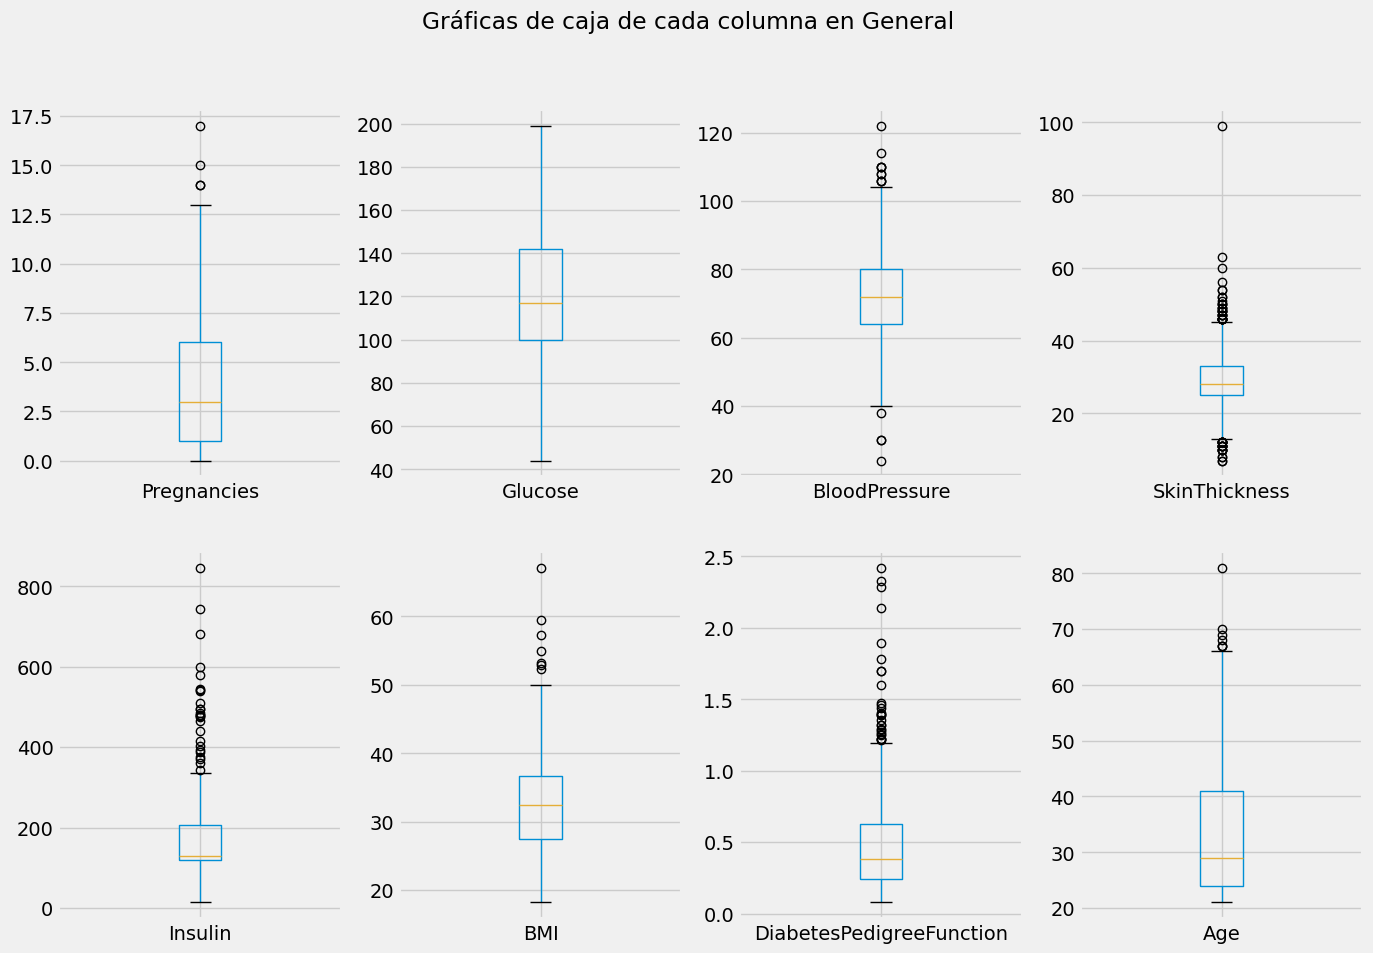

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2,4, figsize = [15,10])
i, j=0, 0
for columna in df.columns.tolist()[:8]:
  df.boxplot(column=columna, ax = ax[i,j])
  j+=1
  if j == 4:
    j = 0
    i = 1
fig.suptitle("Gráficas de caja de cada columna en General")
plt.show()

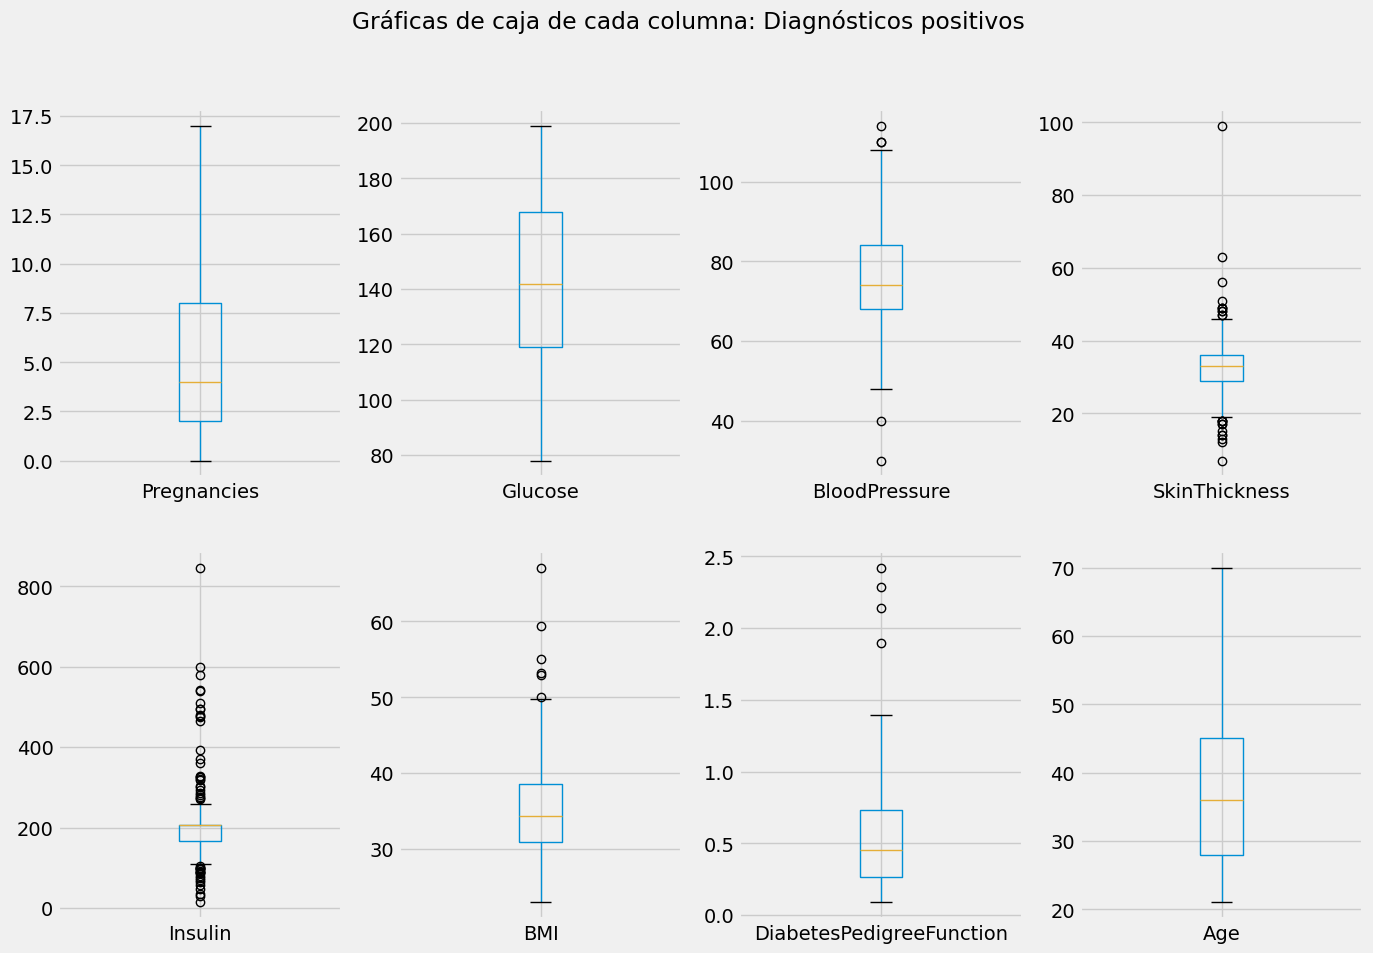

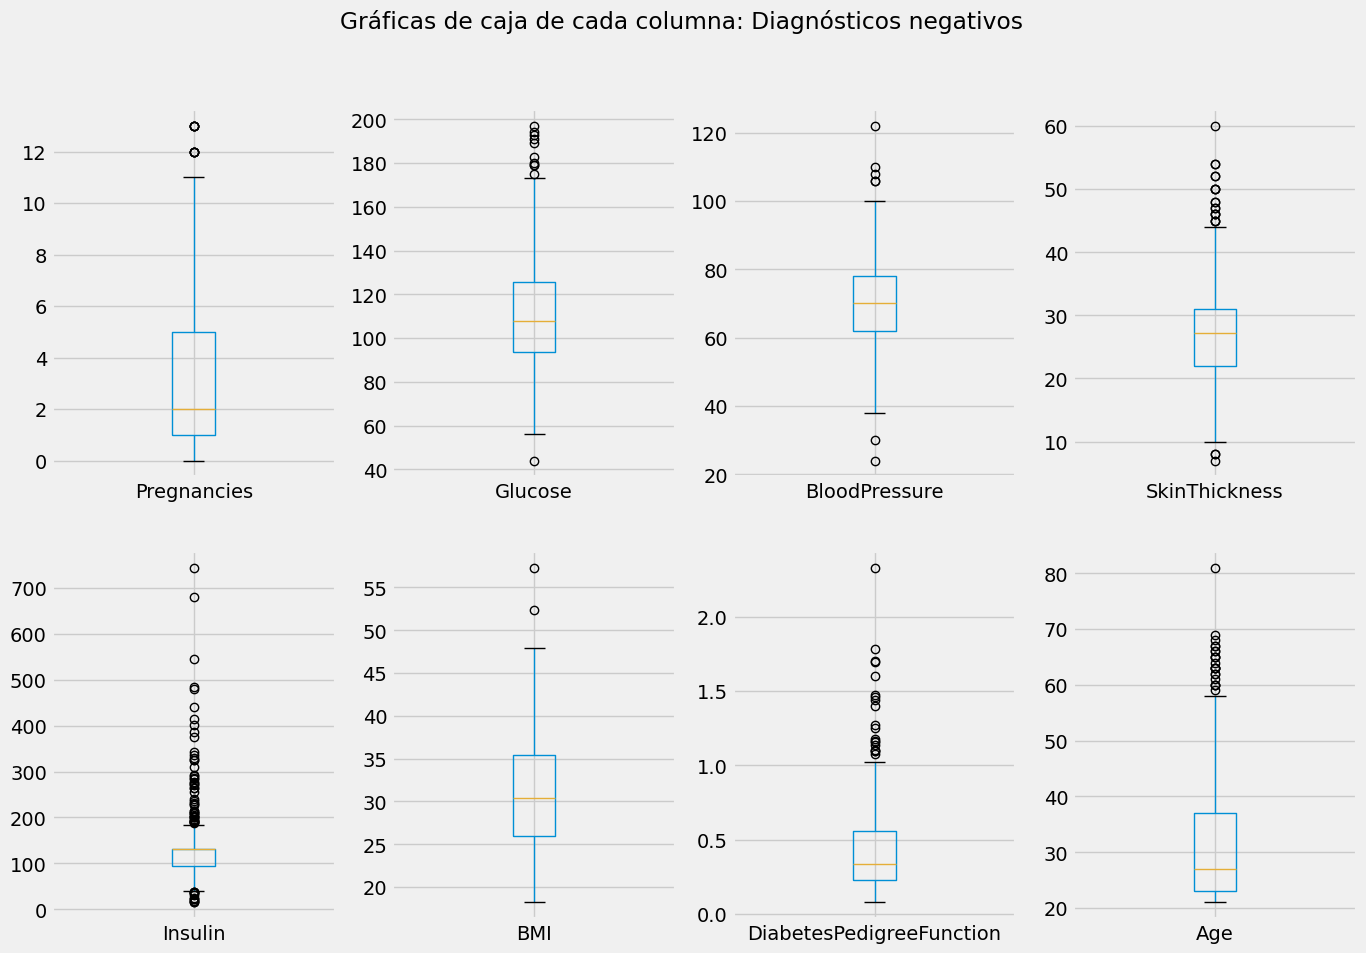

In [ ]:
plt.style.use("fivethirtyeight")
for valor in (1, 0):
  df_separado = df[df.Outcome==valor]
  fig, ax = plt.subplots(2,4, figsize = [15,10])
  i, j=0, 0
  for columna in df.columns.tolist()[:8]:
    df_separado.boxplot(column=columna, ax = ax[i,j])
    j+=1
    if j == 4:
      j = 0
      i = 1
  titulo = "positivos" if valor == 1 else "negativos"
  fig.suptitle("Gráficas de caja de cada columna: Diagnósticos " + titulo)
  plt.show()

Luego, se procedió a generar las graficas de caja de cada una de las columnas del data frame en general y separándolas según el diagnóstico.
En este caso, a pesar de hallar valores atípicos en variables como la insulina, la función pedigree de diabetes o el grosor de piel, se optó por no deshechar estos datos ya que en la práctica es muy factible encontrar valores así.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.00,724.00,724.00,724.00,724.00,724.00,724.00,724.00,724.00
mean,3.87,121.88,72.40,29.24,156.82,32.47,0.47,33.35,0.34
std,3.36,30.75,12.38,9.13,90.87,6.89,0.33,11.77,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,118.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,28.00,130.29,32.40,0.38,29.00,0.00
75%,6.00,142.00,80.00,33.00,206.85,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
pd.concat([df[df.Outcome==0].mean(),df[df.Outcome==1].mean()],axis =1, keys=["Negativo", "Positivo"])

,Negativo,Positivo
Pregnancies,3.320000,4.907631
Glucose,111.016842,142.610442
BloodPressure,70.907368,75.248996
SkinThickness,27.276326,32.983936
Insulin,130.600670,206.846154
BMI,30.974947,35.313655
DiabetesPedigreeFunction,0.430297,0.559594
Age,31.258947,37.341365
Outcome,0.000000,1.000000


**Información que se puede observar en las boxplot y la tabla** con los promedios para los diagnosticos positivos y negativos:


1.   Los valores más altos de embarazos, glucosa, presión de sangre, ancho de la piel, insulina, función de diabetes y la edad parecen estar relacionados a un diagnóstico positivo de diabetes.



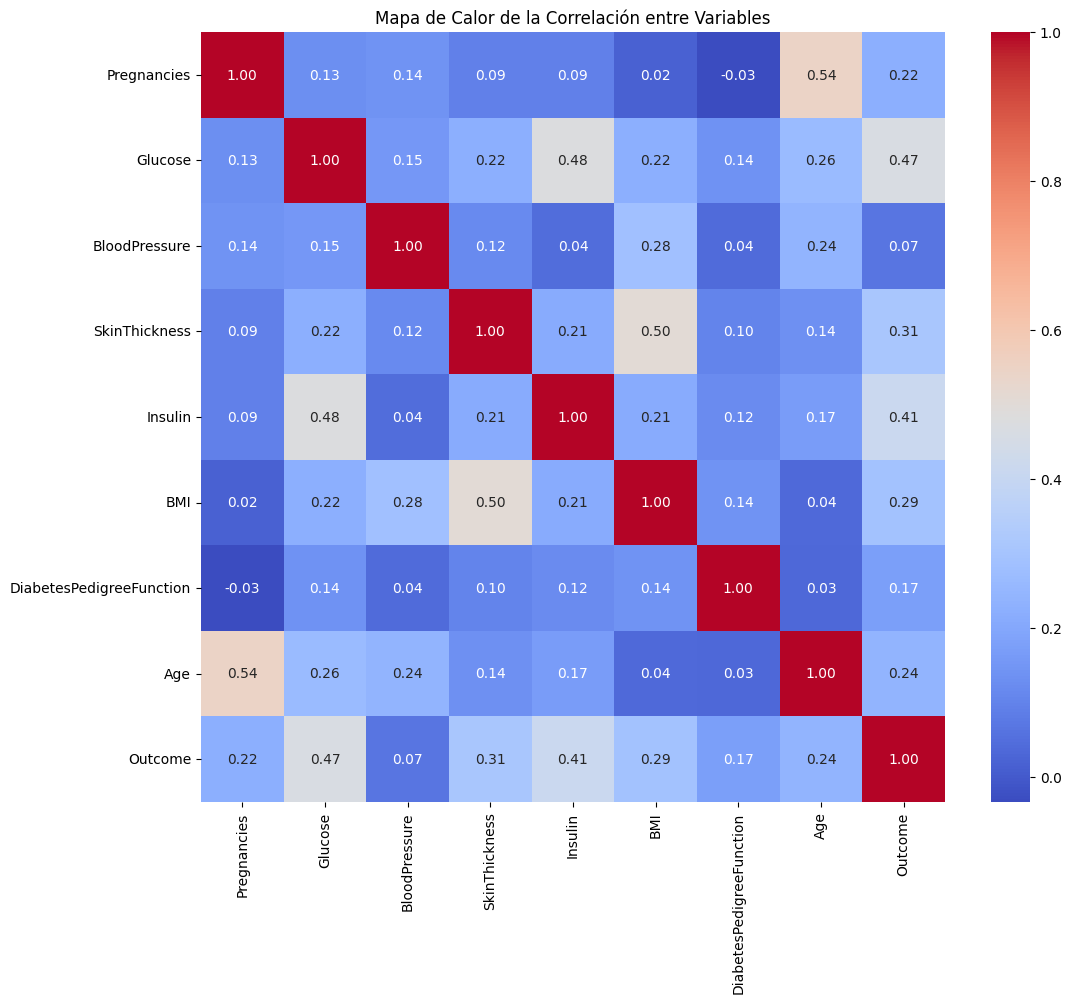

In [4]:
correlation_matrix = df.corr()

# Utilizar Seaborn para crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Mostrar el gráfico
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

# **Parte 2**
Aplicación de modelo de ML

Objetivos del paso: Plantear un problema.

### **Problema:** El problema planteado es predecir si un paciente tiene diabetes basándose en ciertas medidas clínicas incluidas en el conjunto de datos. Este es un problema de clasificación binaria, ya que el resultado que queremos predecir es si el paciente tiene diabetes (1) o no (0).


Los datasets se encuentran divididos en entrenamiento y prueba, o entrenamiento, validación y prueba, de manera aleatoria, con proporciones adecuadas.
Las pruebas de validación cruzada se aplican adecuadamente en conjunto con los algoritmos, de tal manera que no hay datos favoritos o fácilmente clasificables en el dataset de pruebas.

### Casificación con Lazy Predict
Una herramienta muy útil para dar un primer vistazo a los modelos que son más prometedores para solventar un problema de clasificación es la herramienta LazyClassifier de la paquetería LazyPredict, la cual nos permite observar el desempeño aproximado que pueden tener diferentes modelos de clasificación.

In [ ]:
!pip install lazypredict

100%|██████████| 29/29 [00:02<00:00, 12.65it/s]


[LightGBM] [Info] Number of positive: 180, number of negative: 326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355731 -> initscore=-0.593941
[LightGBM] [Info] Start training from score -0.593941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

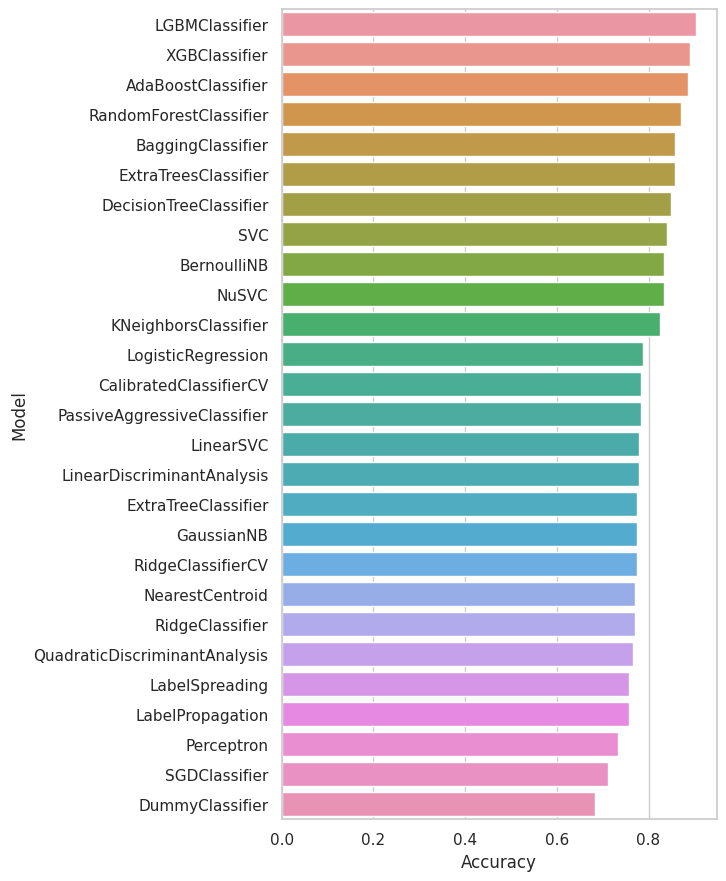

In [ ]:
#Mejor a la floja
# Importa las bibliotecas necesarias
import pandas as pd
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Asumiendo que ya has cargado y preprocesado tu conjunto de datos en df
# y que 'Outcome' es la columna objetivo

# Divide los datos en características y objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Debido a que los modelos en LazyPredict no se ajustan automáticamente a la escala,
# debemos escalar las características manualmente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializa LazyClassifier para clasificación binaria
clf = LazyClassifier(predictions=True)

# Ajusta el modelo y obtén los resultados
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Imprime los resultados
#print(models)
models_accuracy = models.sort_values(by="Accuracy", ascending=False).copy()
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_accuracy.index, x=models_accuracy["Accuracy"])

Esto nos muestra que el modelo más prometedor es el Light Gradient Boost Machine Classifier que usa algoritmos de árboles de decisión.
Sin embargo, se decidió explorar algunos de los modelos que hemos trabajado en el curso ya que son con los cuales estamos más familiarizados.

Cross-validation scores: 0.7872340425531915 +/- 0.03980486581674406
Confusion Matrix:
[[147  20]
 [ 35  52]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       167
           1       0.72      0.60      0.65        87

    accuracy                           0.78       254
   macro avg       0.76      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254

ROC AUC Score: 0.8574574987955125


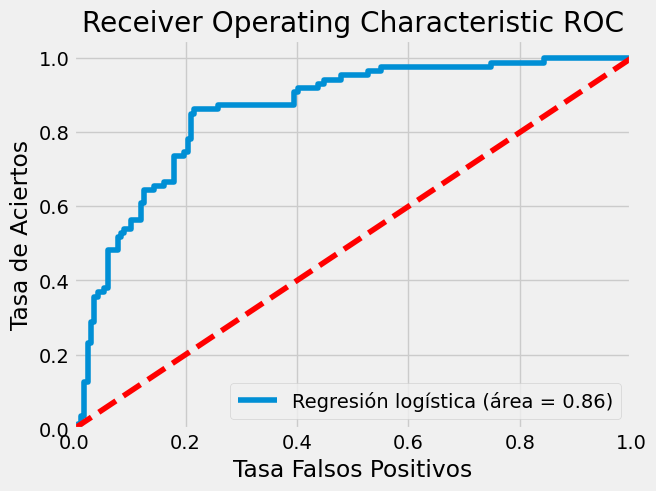

                   Variable  Importancia
1                   Glucose     0.889707
4                   Insulin     0.592550
5                       BMI     0.440780
0               Pregnancies     0.387862
6  DiabetesPedigreeFunction     0.368505
3             SkinThickness     0.319127
7                       Age     0.283704
2             BloodPressure    -0.163678


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Preparación de los datos
X = df.drop('Outcome', axis=1)
y = df['Outcome']  # Target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construcción del modelo de regresión logística
model = LogisticRegression(multi_class = 'ovr', solver = 'liblinear')
model.fit(X_train_scaled, y_train)

# Validación cruzada
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores.mean()} +/- {scores.std()}")

# Evaluación del modelo
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(classification_report(y_test, y_pred))

# Métricas de rendimiento adicionales
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión logística (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa de Aciertos')
plt.title('Receiver Operating Characteristic ROC')
plt.legend(loc="lower right")
plt.show()

# Interpretación de resultados
feature_importance = model.coef_[0]
features_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importance})
print(features_df.sort_values(by='Importancia', ascending=False))


**Observación:**

Se mantiene la esperada  importancia de la glucosa y la insulina.

Está después el índice de masa corporal con un coeficiente positivo, indicando que los niveles más altos de BMI están asociados con la diabetes.

La edad tiene un impacto positivo en la probabilidad de tener diabetes, lo cual tiene sentido ya que el riesgo de diabetes aumenta con la edad.

Un número mayor de embarazos está asociado con un aumento en la probabilidad de diabetes, lo cual podría estar relacionado con la diabetes gestacional y su impacto en la salud a largo plazo.

Accuracy of Decision Tree: 0.8464566929133859
ROC AUC Score for Decision Tree: 0.8364305871016589
                   Variable  Importancia
4                   Insulin     0.551830
7                       Age     0.124037
1                   Glucose     0.094357
3             SkinThickness     0.089776
5                       BMI     0.076965
2             BloodPressure     0.023089
0               Pregnancies     0.020904
6  DiabetesPedigreeFunction     0.019043


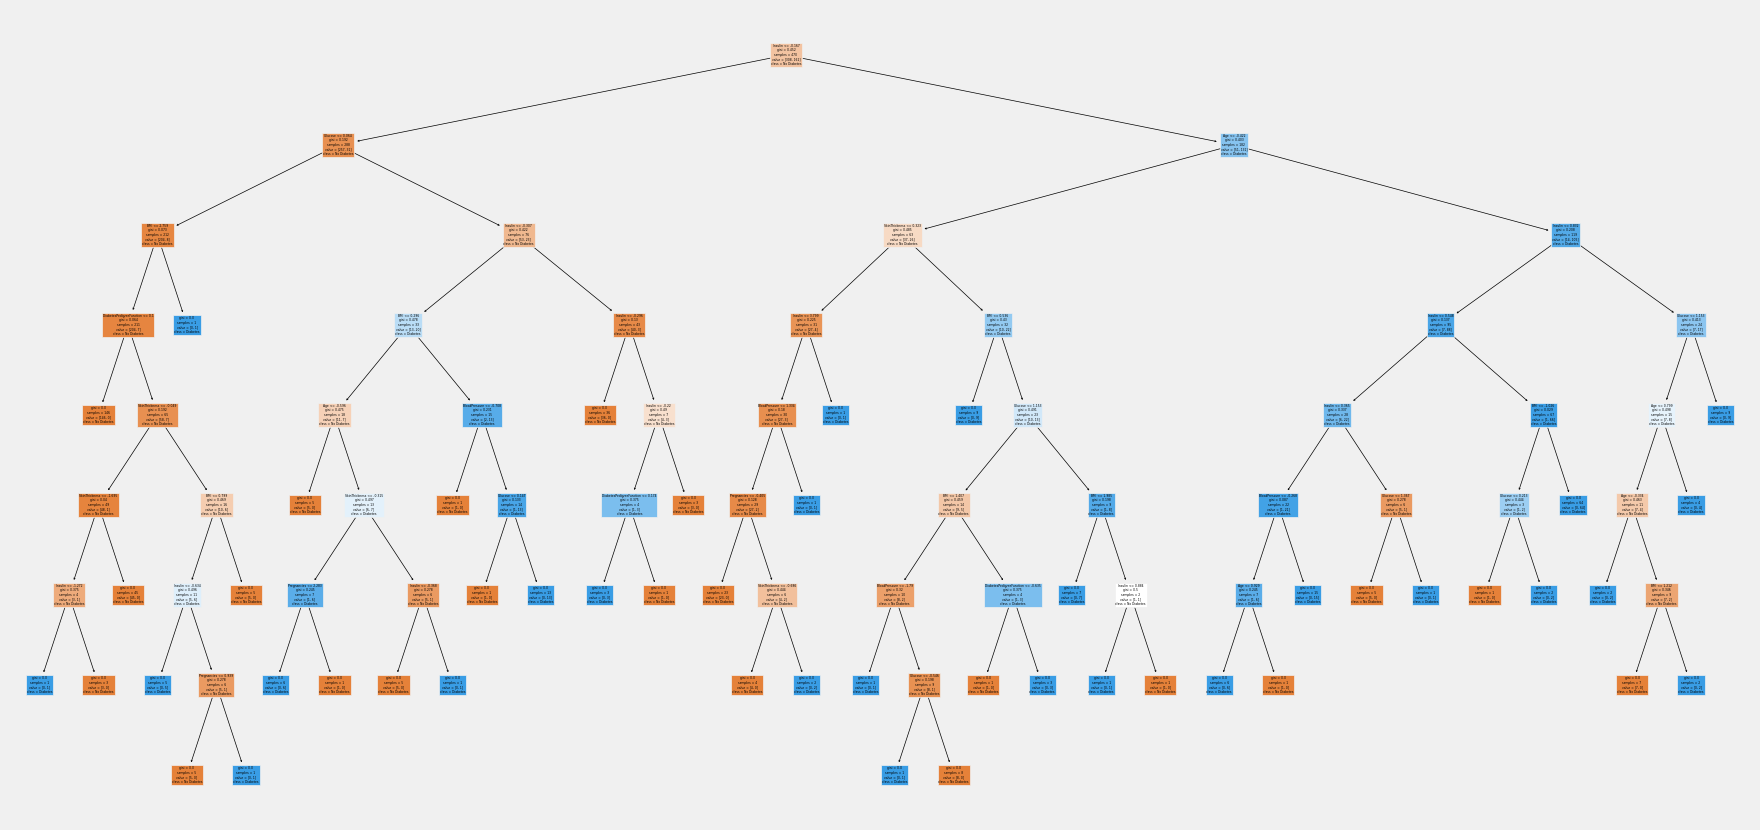

In [ ]:
#Probando con árboles de decisión para ver sus resultados de predicción
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(criterion = 'gini',random_state=42)

# Entrenar el modelo
tree_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree: {accuracy}")

# Calcular el AUC
roc_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score for Decision Tree: {roc_auc}")

# Puedes también querer ver la importancia de las características
feature_importances = tree_model.feature_importances_
importances_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importances})
print(importances_df.sort_values(by='Importancia', ascending=False))

# Y si deseas visualizar el árbol de decisión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


**Observación:** Los resultados del árbol de decisión muestran una precisión y un AUC ligeramente más bajos en comparación con el modelo de regresión logística anterior

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parámetros para GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Crear el modelo de árbol de decisión con GridSearchCV
tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Ver los mejores parámetros
print("Mejores parámetros: ", grid_search.best_params_)

# Predecir en el conjunto de prueba con el mejor modelo encontrado
y_pred_tree_best = grid_search.predict(X_test_scaled)

# Calcular la precisión y el AUC con el mejor modelo
accuracy_best = accuracy_score(y_test, y_pred_tree_best)
roc_auc_best = roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled)[:, 1])
print(f"Mejor precisión del Árbol de Decisión: {accuracy_best}")
print(f"Mejor ROC AUC del Árbol de Decisión: {roc_auc_best}")


Mejores parámetros:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 2}
Mejor precisión del Árbol de Decisión: 0.8385826771653543
Mejor ROC AUC del Árbol de Decisión: 0.9009911212058642


## Perceptrón Multicapa

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Se cargan las entradas y los targets
X = df.drop('Outcome', axis=1)
y = df['Outcome']  # Target

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Configura y entrena el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(32, 16, 8, 4,), activation='logistic', solver='adam', max_iter=5000, alpha = 0.0001, random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 85.08%


Se encontraron ciertas configuraciones del perceptrón multicapa que dan a lugar a buenos porcentajes de clasificación. Sin embargo, en lo general se encontró que oscilan entre el 78% y el 85% de precisión, lo cual no es muy alto comparado con otros modelos.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Se cargan las entradas y los targets
X = df.drop('Outcome', axis=1)
y = df['Outcome']  # Target

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliza los datos (opcional pero recomendado)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define el modelo de la red neuronal utilizando TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(32, activation='relu'),     # Capa oculta con 32 neuronas y función de activación ReLU
    tf.keras.layers.Dense(16, activation='relu'),     # Capa oculta con 16 neuronas y función de activación ReLU
    tf.keras.layers.Dense(8, activation='relu'),     # Capa oculta con 8 neuronas y función de activación ReLU
    tf.keras.layers.Dense(2, activation='softmax')    # Capa de salida con 3 neuronas (clases) y función de activación softmax
])

# Compila el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = [tf.argmax(pred).numpy() for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Epoch 1/50
13/13 [==============================] - 1s 16ms/step - loss: 1.6677 - accuracy: 0.4554 - val_loss: 0.9601 - val_accuracy: 0.4020
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.8268 - accuracy: 0.5322 - val_loss: 0.7890 - val_accuracy: 0.6078
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7557 - accuracy: 0.6213 - val_loss: 0.7516 - val_accuracy: 0.5980
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.7148 - accuracy: 0.6213 - val_loss: 0.7172 - val_accuracy: 0.6569
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.6386 - val_loss: 0.6866 - val_accuracy: 0.6078
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6361 - val_loss: 0.6757 - val_accuracy: 0.6275
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6319 - accuracy: 0.6708 - val_loss: 0.5957 - val_accuracy: 0.7157
Epoch 8/50
13/13 [=

# **Parte 3**

Presentación de resultados

Objetivos del paso: Mostrar los hallazgos mediante visualizaciones claras y atractivas.

Con base en el análisis, proceso y entrenamiento de los datos con los modelos de ML podemos concluir que:


*   La identificación y corrección de valores cero en variables como la 'Insulina' y 'Grosor de la Piel' destacan la importancia crítica de la limpieza de datos en el análisis.
*   Los valores de cada variable, si son más altos, genera una relación más estrecha con el diagnóstico o predicción de la diabetes con un valor positivo.
*   Las variables mas representativas son los niveles de glucosa e insulina.
*   Existen valores atípicos por una mala medición de los parámetros médicos o no se tuvo acceso a dicho valor.
*   El estandarizar los datos para el tratamiento y entrenamiento en los modelos facilitó que los resultados tuvieran un rendimiento alto.
*   En su mayoría, las pacientes con mayor edad, mayores niveles de BMI o de embarazos generaron un resultado positivo en la detección de diabetes.
*   El mejor modelo de predicción fue el de Árbol de decisión seguido por el modelo GridSearchCV.

**Trabajos a futuro**

*   Obtener variables con todos los valores por registro.
*   Información del modelo con variables para el género másculino.
*   Replicar obtención, análisis, limpieza y clasificación para personas del país.
*   Mejorar un comparativo de los modelos utilizados en el proyecto.


Procedimos a elaborar un documento de reporte y un video con el resumen de los hallazgos de este notebook.







